<h2> Scanning tail radar sweep plot

This scripts shows an example of plotting a sweep file from the NOAA P-3 or
G-IV aircraft (also may work with older Eldora data if in correct format).

<i>Note the data shown is not QC'd</li>

In [1]:
# Load the needed packages
from glob import glob
import matplotlib.pyplot as plt

import awot
from awot.graph import RadarSweepPlot

%matplotlib inline

<p>Plot a cfradial formatted sweep file from the NOAA P-3. This should work on data from 2012 onward.
<p>First, we'll plot the data track-relative. This type of plot projects the data onto a coordinate system about the aircraft track (removes tilt angles).

<p>Note that no correction is made to ground level (i.e. aircraft location is zero point)


(-72.568491740752876, 72.568491740752876) (-10.0, 15.0)


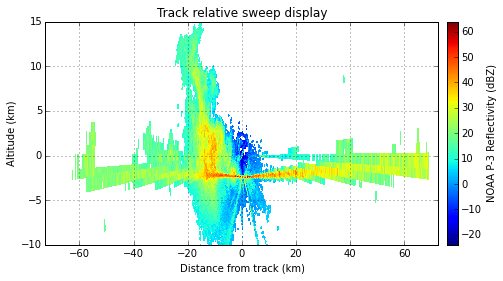

In [2]:
fnc = '/Users/guy/data/p3radar/HRD_test/20120828/cfradial/cfrad.20120828_120541.113_to_20120828_120547.113_N42R_v1_s00_az-19.48_AIR.nc'

RadName = 'NOAA P-3 Tail Radar'

cbTx = 'NOAA P-3 Reflectivity '
tTx = "Track relative sweep display"

Field1, Field2 = 'DBZ', 'VEL'
FLim1, FLim2 = (0., 60.), (-40., 40.)
RngRings = [15., 30., 46., 60.]
RngLim = (-70., 70.)
HtLim = (-10.,20.)
dMax = 45.

# Creating axes outside seems to screw up basemap
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Get the tail radar data and map it to an AWOT radar instance
# If false it retains the Py-ART radar instance
r = awot.io.read_tdr_sweep(fname=fnc, map_to_awot=True, platform='noaap3')
# Create a RadarSweepPlot instance and add track-relative plot
rgp = RadarSweepPlot(r)
rgp.plot_track_relative(Field1, mask_procedure=None, mask_tuple=None,
                        cb_pad=.02, cb_orient='vertical', cb_label=cbTx+"(dBZ)",
                        ylims=(-10.,15.), title=tTx, ax=ax, fig=fig)

Now let's plot the same data, but in an earth relative coordinate system. Notice that depending on aircraft orientation, the plot may change.

(-32.218344829857259, 32.218344829857259) (-10.0, 15.0)


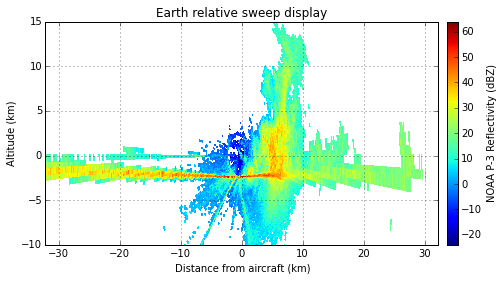

In [3]:
fnc = '/Users/guy/data/p3radar/HRD_test/20120828/cfradial/cfrad.20120828_120541.113_to_20120828_120547.113_N42R_v1_s00_az-19.48_AIR.nc'

RadName = 'NOAA P-3 Tail Radar'

tTx = "Earth relative sweep display"

# Creating axes outside seems to screw up basemap
fig2, ax2 = plt.subplots(1, 1, figsize=(8, 4))

# Create a RadarSweep
rgp.plot_earth_relative(Field1, mask_procedure=None, mask_tuple=None,
                        cb_pad=.02, cb_orient='vertical', cb_label=cbTx+"(dBZ)",
                        ylims=(-10.,15.), title=tTx, ax=ax2, fig=fig2)

<p>By using Py-ART as the reader for the sweep files, a Sigmet file can also be used.
<p>The following data is from the NOAA P-3, collected during Hurrican Arthur (2014).

(-66.170851944390648, 66.170851944390648) (-10.0, 15.0)


/Users/guy/anaconda/lib/python2.7/site-packages/numpy/core/records.py:405: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  strides=strides, order=order)


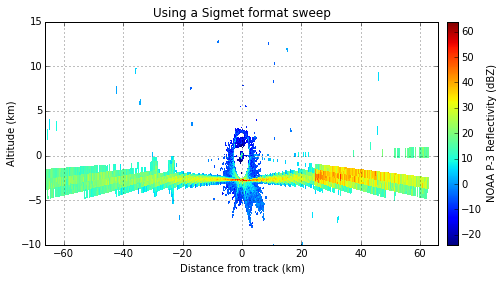

In [4]:
fSig = '/Users/guy/data/p3radar/arthur/data/raw/2TA140705120336.RAWTR67'

Field = 'reflectivity'
tTx = "Using a Sigmet format sweep"

# Creating axes outside seems to screw up basemap
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 4))

# Get the tail radar data
rsig = awot.io.read_tdr_sweep(fname=fSig, map_to_awot=True, platform='noaap3')

# Create a RadarSweep
rgp = RadarSweepPlot(rsig)

rgp.plot_track_relative(Field, mask_procedure=None, mask_tuple=None,
                        cb_pad=.02, cb_orient='vertical', cb_label=cbTx+"(dBZ)",
                        ylims=(-10.,15.), title=tTx, ax=ax3, fig=fig3)